In [47]:
import pickle
import shap
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

In [33]:
model_path = "../outputs/logistic_regression_none_poverty.pkl"
model = joblib.load(model_path)

In [34]:
train_path = "../outputs/train_df.csv"
train_df = pd.read_csv(train_path)

In [31]:
model = SVC(probability=True)

In [36]:
X = train_df.drop(columns=["fully_funded", "date_posted"])
y = train_df["fully_funded"]

In [38]:
explainer = shap.LinearExplainer(model, X)

In [39]:
shap_values = explainer(X)

In [43]:
shap_values

.values =
array([[0.1624345415579744, 0.00039751892124705306, 0.03480234062840916,
        ..., 0.019039371130285154, 0.0539252777106004, 6.663134341457639],
       [0.2401372586706352, 0.00039751892124705306, 0.03480234062840916,
        ..., 0.019039371130285154, 0.0539252777106004, 6.663134341457639],
       [0.16094025853657698, 0.00039751892124705306, 0.03480234062840916,
        ..., 0.019039371130285154, 0.0539252777106004, 6.663134341457639],
       ...,
       [0.0403665615400274, 0.00031264614824633776, -0.08982792489758919,
        ..., 0.019039371130285154, 0.0539252777106004,
        -0.6589913084958104],
       [0.08478412435106279, 0.0002969289680610199, 0.03480234062840916,
        ..., 0.019039371130285154, 0.0539252777106004,
        -0.6589913084958104],
       [0.2315003028069584, 0.0003283633284316556, -0.08982792489758919,
        ..., 0.019039371130285154, 0.0539252777106004,
        -0.6589913084958104]], dtype=object)

.base_values =
array([3.46132248, 3.461322

In [48]:
shap.plots.force(
    explainer.expected_value,
    shap_values.values[0, :],
    X.iloc[0, :]
)

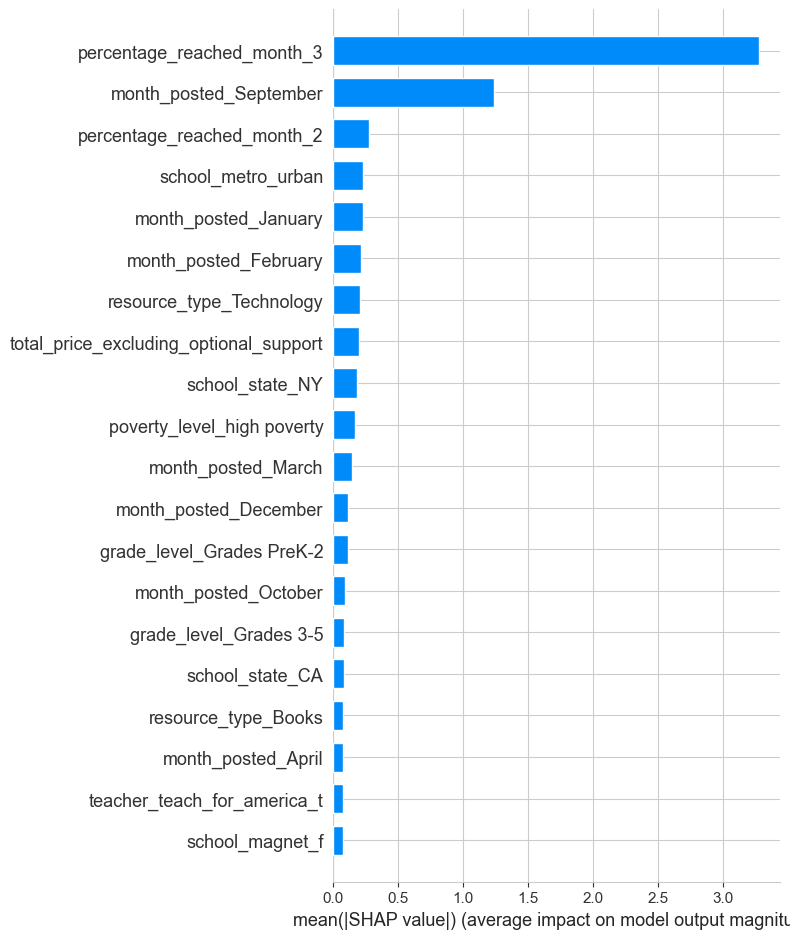

In [49]:
shap.summary_plot(shap_values.values, X, plot_type="bar")

In [51]:
force_plot = shap.force_plot(
    explainer.expected_value,
    shap_values.values[0, :],
    X.iloc[0, :]
)
shap.save_html("force_plot.html", force_plot)